In [1]:
import matplotlib.pyplot as plt
import numpy as np

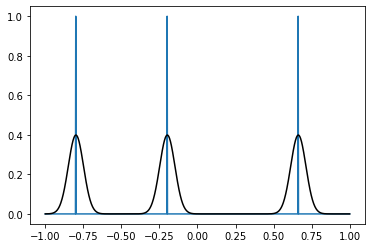

In [10]:
# Convolution
from scipy.stats import norm

xs = np.linspace(-1, 1, 1000)
gaussian = norm.pdf(20 * xs)
deltas = np.zeros_like(xs)
deltas[[100, 400, 830]] = 1

plt.plot(xs, deltas)
plt.plot(xs, np.convolve(gaussian, deltas, mode='same'), color='black')
plt.savefig('convolution.pdf')
plt.show()